****
## **Analisis Faktor yang Mempengaruhi Rating Pelanggan pada E-Commerce Elektronik**
****

****
## **LATAR BELAKANG BISNIS**
****
Perusahaan mengkhususkan diri dalam penjualan e-commerce barang elektronik. Dikenal dengan berbagai macam produk berkualitas dengan harga kompetitif, perusahaan melayani pelanggan di berbagai wilayah. Untuk memastikan pengiriman yang efisien, perusahaan mengelola gudangnya sendiri dan menangani pengiriman secara langsung, menggunakan transportasi darat, laut, dan udara.

Perusahaan mengalami penurunan rating kepuasan pelanggan dan perlu memahami bagaimana faktor-faktor operasional pengiriman mempengaruhi rating pelanggan. Rating pelanggan sangat penting untuk reputasi perusahaan dan bisnis berulang. Dengan menganalisis hubungan antara ketepatan waktu pengiriman, strategi diskon, frekuensi panggilan pelayanan pelanggan dengan rating pelanggan, perusahaan dapat mengidentifikasi area perbaikan dalam proses pengiriman yang akan langsung meningkatkan kepuasan pelanggan.

****
## **Pernyataan Masalah Bisnis**
****
Perusahaan mengalami penurunan rating kepuasan pelanggan dan perlu memahami bagaimana faktor-faktor yang mempengaruhi rating pelanggan. Rating pelanggan sangat penting untuk reputasi perusahaan dan bisnis berulang. Dengan menganalisis hubungan antara operasional pengiriman dan rating pelanggan, perusahaan dapat mengidentifikasi area perbaikan dalam proses pengiriman yang akan langsung meningkatkan kepuasan pelanggan.

Sebagai analis data, telah dihasilkan tujuan bisnis:

1. Mengidentifikasi hubungan antara ketepatan waktu pengiriman dengan rating pelanggan
2. Mengidentifikasi hubungan antara strategi diskon dengan rating pelanggan
3. Mengidentifikasi hubungan antara frekuensi panggilan pelayanan pelanggan dengan rating pelanggan
4. Menentukan faktor yang paling signifikan dalam mempengaruhi rating pelanggan dan Memberikan rekomendasi perbaikan operasional pengiriman yang dapat meningkatkan rating pelanggan

Dengan menjawab pernyataan ini, kami dapat memberikan wawasan yang dapat ditindaklanjuti yang akan membantu perusahaan meningkatkan kepuasan pelanggan.

****
## **Memuat Dataset**
****


In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# set style untuk visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Import dataset
df = pd.read_csv('Online Retail Shipping.csv')

# Menampikan 5 baris pertama dan terakhir
display(df.head())
display(df.tail())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


Dataset ini berisi informasi tentang detail pengiriman produk pelanggan. Berikut Deskripsi masing-masing kolom:

| No | Nama Kolom           | Deskripsi                                                                                            |
|----|---------------------|--------------------------------------------------------------------------------------------------------|
| 1  | ID                  | Nomor ID pelanggan.                                                                                |
| 2  | Warehouse block     | Perusahaan memiliki gudang besar yang dibagi menjadi blok (A-E).                                     |
| 3  | Mode of Shipment    | Perusahaan mengirim produk dengan berbagai cara (Ship, Flight, dan Road).                              |
| 4  | Customer care calls | Jumlah panggilan yang dibuat untuk menanyakan pengiriman.                                 |
| 5  | Customer rating     | Rating dari setiap pelanggan. 1 adalah terendah, dan 5 adalah tertinggi.                                        |
| 6  | Cost of the Product | Harga produk dalam US Dollars.                                                                     |
| 7  | Prior purchases     | Jumlah pembelian sebelumnya.                                                                      |
| 8  | Product importance  | Perusahaan telah mengkategorikan produk dalam berbagai parameter (low, medium, high).                     |
| 9  | Gender              |  Pria dan wanita.                                                                                      |
| 10 | Discount offered    | Diskon yang ditawarkan pada produk tertentu.                                                             |
| 11 | Weight in gms       | Berat dalam gram.                                                                                   |
| 12 | Reached on Time_Y.N      | 1 menunjukkan bahwa produk tidak tiba tepat waktu, dan 0 menunjukkan produk telah tiba tepat waktu.                      |
"""

****
## **Pemahaman Data**
****
Sebelum melakukan analisis, penting untuk memahami dataset kita secara menyeluruh. Ini melibatkan pemeriksaan berbagai aspek seperti variabel numerik dan kategorikal, dan statistik ringkasan termasuk tipe data, jumlah, nilai null, jumlah unik, dan nilai unik. Kami juga akan melakukan deskripsi statistik untuk variabel numerik dan kategorikal untuk mendapatkan wawasan tentang distribusi dan karakteristiknya. Proses eksplorasi data yang komprehensif ini akan menjadi dasar untuk analisis dan pengambilan keputusan kami selanjutnya.

### **Tipe Variabel Data (Numerik dan Kategorikal)**

| No | Nama Kolom Numerik | Deskripsi                                                                                            |
|----|-----------------------|--------------------------------------------------------------------------------------------------------|
| 1  | ID                    | Nomor ID pelanggan.                                                                                |
| 2  | Customer care calls   | Jumlah panggilan yang dibuat untuk menanyakan pengiriman.                                 |
| 3  | Customer rating       | Rating dari setiap pelanggan. 1 adalah terendah, dan 5 adalah tertinggi.                                        |
| 4  | Cost of the Product   | Harga produk dalam US Dollars.                                                                     |
| 5  | Prior purchases       | Jumlah pembelian sebelumnya.                                                                      |
| 6  | Discount offered      | Diskon yang ditawarkan pada produk tertentu.                                                             |
| 7  | Weight in gms         | Berat dalam gram.                                                                                   |
| 8  | Reached on Time_Y.N      | 1 menunjukkan bahwa produk tidak tiba tepat waktu, dan 0 menunjukkan produk telah tiba tepat waktu.                      |

| No | Nama Kolom Kategorikal | Deskripsi                                                                                            |
|----|-------------------------|--------------------------------------------------------------------------------------------------------|
| 1  | Warehouse block         | Perusahaan memiliki gudang besar yang dibagi menjadi blok (A-E).                                     |
| 2  | Mode of shipment        | Perusahaan mengirim produk dengan berbagai cara (Ship, Flight, dan Road).                              |
| 3  | Product importance      | Perusahaan telah mengkategorikan produk dalam berbagai parameter (low, medium, high).                     |
| 4  | Gender                  |  Pria dan wanita.                                                                                      |

### **Ringkasan Data**

In [2]:
print('INFORMASI DATA')
print('='*30)
print(f'Total Baris           : {df.shape[0]}')
print(f'Total Kolom        : {df.shape[1]}')

print('\nJumlah Tipe Data     :')
print(df.dtypes.value_counts())
print('\nJumlah Nilai Non-Null :')
print(df.notnull().count())

summary_df = pd.DataFrame({
    'Nama Kolom': df.columns.values,
    'Tipe Data': df.dtypes.values,
    'Jumlah Data': df.count().values,
    'Nilai Null': df.isnull().sum().values,
    'Jumlah Nilai Unik': df.nunique().values
})

display(summary_df)

INFORMASI DATA
Total Baris           : 10999
Total Kolom        : 12

Jumlah Tipe Data     :
int64     8
object    4
Name: count, dtype: int64

Jumlah Nilai Non-Null :
ID                     10999
Warehouse_block        10999
Mode_of_Shipment       10999
Customer_care_calls    10999
Customer_rating        10999
Cost_of_the_Product    10999
Prior_purchases        10999
Product_importance     10999
Gender                 10999
Discount_offered       10999
Weight_in_gms          10999
Reached.on.Time_Y.N    10999
dtype: int64


,Nama Kolom,Tipe Data,Jumlah Data,Nilai Null,Jumlah Nilai Unik
0,ID,int64,10999,0,10999
1,Warehouse_block,object,10999,0,5
2,Mode_of_Shipment,object,10999,0,3
3,Customer_care_calls,int64,10999,0,6
4,Customer_rating,int64,10999,0,5
5,Cost_of_the_Product,int64,10999,0,215
6,Prior_purchases,int64,10999,0,8
7,Product_importance,object,10999,0,3
8,Gender,object,10999,0,2
9,Discount_offered,int64,10999,0,65


In [3]:
# Descriptive statistics untuk variabel numerik
print('STATISTIK DESKRIPTIF - VARIABEL NUMERIK')
print('='*40)
display(df.describe().T)

STATISTIK DESKRIPTIF - VARIABEL NUMERIK


,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [4]:
# Descriptive statistics untuk variabel kategorikal
print('STATISTIK DESKRIPTIF - VARIABEL KATEGORIKAL')
print('='*40)
display(df.describe(include=object).T)

STATISTIK DESKRIPTIF - VARIABEL KATEGORIKAL


,count,unique,top,freq
Warehouse_block,10999,5,F,3666
Mode_of_Shipment,10999,3,Ship,7462
Product_importance,10999,3,low,5297
Gender,10999,2,F,5545


**Ringkasan**
- Dataset memiliki: 
    + 8 kolom numerik (`ID`, `Customer_care_calls`, `Customer_rating`, `Cost_of_the_Product`, `Prior_purchases`, `Discount_offered`, `Weight_in_gms`, dan `Reached.on.Time_Y.N`)
    + 4 kolom kategorikal (`Warehouse_block`, `Mode_of_Shipment`, `Product_importance`, dan `Gender`)
- Dataset memiliki 12 kolom dan 10999 baris.
- Tidak ada kolom yang memiliki nilai null atau nilai negatif.
- Delivery_Status: 40.3% pengiriman terlambat, dengan rating 0.247 poin lebih rendah dibanding pengiriman tepat waktu.
- Product_Discount: 20.08% order memiliki diskon ekstrem (>19%), namun tidak meningkatkan rating pelanggan secara signifikan.
- Customer_Calls: Order dengan >4 panggilan customer service (28.5% dari total) cenderung mendapat rating lebih rendah.

****
## **Pembersihan Data**
****
Pembersihan data adalah proses mempersiapkan dataset kami untuk analisis dengan memastikannya akurat dan terorganisir dengan baik. Kami mulai dengan menangani data yang hilang, duplikat, dan masalah pemformatan. Kemudian, kami menghapus kolom yang tidak perlu untuk fokus pada informasi yang paling relevan. Selanjutnya, kami menyempurnakan label dan struktur data kami untuk memudahkan pemahaman. Kami juga menganalisis distribusi data kami untuk memahami bagaimana penyebarannya. Proses ini ditujukan untuk memastikan bahwa dataset kami bersih, koheren, dan siap untuk analisis mendalam.

### **Pengecekan Data: *Missing Values*, *Duplicates*, dan *Formatting***

Sebelum melanjutkan dengan analisis, penting untuk memverifikasi kualitas data kami. Ini melibatkan pemeriksaan informasi yang hilang, mengidentifikasi dan menghapus entri duplikat, dan memastikan pemformatan konsisten di seluruh dataset. Langkah-langkah ini memastikan fondasi yang lebih akurat dan andal untuk analisis kami selanjutnya.

In [5]:
# Memeriksa missing value
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [6]:
# Memeriksa data duplikat
print('PEMERIKSAAN DATA DUPLIKAT')
df.duplicated().sum()

PEMERIKSAAN DATA DUPLIKAT


np.int64(0)

Setelah memeriksa data, kami tidak menemukan missing values atau entri duplikat di dataset.

### **Mengganti Kategori di Kolom Reached.on.Time_Y.N**

In [7]:
# mengubah nilai numerik menjadi kategorikal yang lebih deskriptif
# Backup data asli
df['Reached.on.Time_Y.N_original'] = df['Reached.on.Time_Y.N']

# Mengubah menjadi kategorikal deskriptif
delivery_mapping = {1: 'Tidak Tepat Waktu', 0: 'Tepat Waktu'}
df['Delivery_Status'] = df['Reached.on.Time_Y.N'].map(delivery_mapping)

print("Sebelum transformasi:")
print(df['Reached.on.Time_Y.N'].value_counts())
print("\nSetelah transformasi:")
print(df['Delivery_Status'].value_counts())


Sebelum transformasi:
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

Setelah transformasi:
Delivery_Status
Tidak Tepat Waktu    6563
Tepat Waktu          4436
Name: count, dtype: int64


### **Menghapus Kolom Tidak Relevan**

Berdasarkan rumusan masalah, analisis ini hanya akan difokus pada 4 variabel sebagai berikut:

1. Customer_rating (target)
1. Reached.on.Time_Y.N (ketepatan waktu)
1. Discount_offered (diskon)
1. Customer_care_calls (frekuensi panggilan)


In [8]:
# Daftar kolom yang akan dipertahankan (sesuai rumusan masalah)
kolom_relevan = [
    'Customer_rating',       
    'Reached.on.Time_Y.N',   
    'Delivery_Status',        
    'Discount_offered',       
    'Customer_care_calls'     
]

# Membuat dataframe baru hanya dengan kolom relevan
df_clean = df[kolom_relevan].copy()
display(df_clean.head())

,Customer_rating,Reached.on.Time_Y.N,Delivery_Status,Discount_offered,Customer_care_calls
0,2,1,Tidak Tepat Waktu,44,4
1,5,1,Tidak Tepat Waktu,59,4
2,2,1,Tidak Tepat Waktu,48,2
3,3,1,Tidak Tepat Waktu,10,3
4,2,1,Tidak Tepat Waktu,46,2


### **Mengganti Nama Kolom**

In [9]:
# mengganti nama kolom 
rename_dict = {
    'Customer_rating': 'Rating_Pelanggan',
    'Reached.on.Time_Y.N': 'Status_Pengiriman_Num',
    'Delivery_Status': 'Status_Pengiriman',
    'Discount_offered': 'Diskon',
    'Customer_care_calls': 'Frekuensi_Panggilan'
}
df_clean = df_clean.rename(columns=rename_dict)
display(df_clean.head())

,Rating_Pelanggan,Status_Pengiriman_Num,Status_Pengiriman,Diskon,Frekuensi_Panggilan
0,2,1,Tidak Tepat Waktu,44,4
1,5,1,Tidak Tepat Waktu,59,4
2,2,1,Tidak Tepat Waktu,48,2
3,3,1,Tidak Tepat Waktu,10,3
4,2,1,Tidak Tepat Waktu,46,2


### **Pengecekan Distribusi Data**

Memahami distribusi data merupakan langkah penting dalam analisis data. Dengan menganalisis distribusi setiap variabel, kita dapat mengetahui pola sebaran, nilai pusat, serta mendeteksi outlier dan potensi masalah dalam dataset sebagai dasar untuk analisis lanjutan


VISUALISASI DISTRIBUSI DATA
----------------------------------------


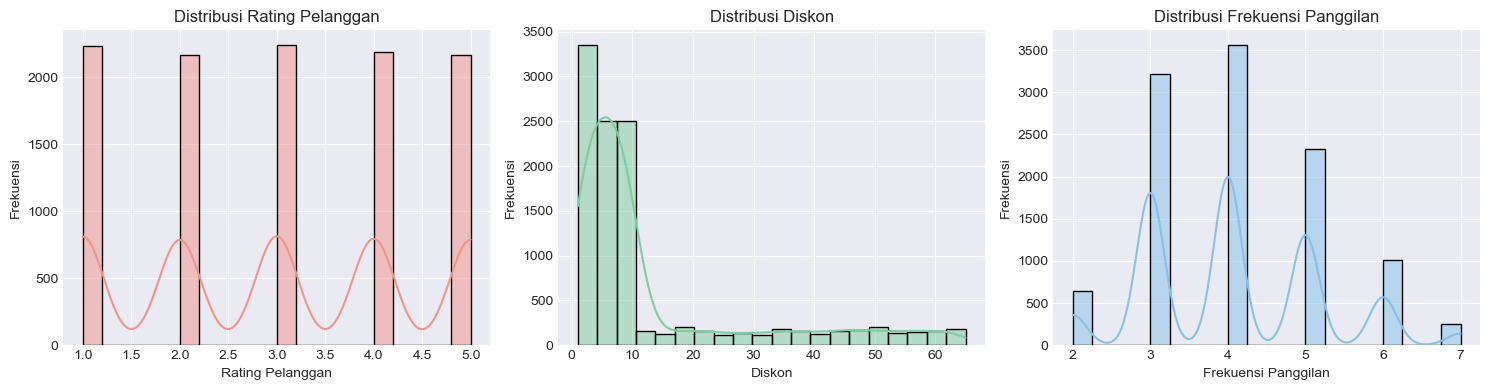


2. UJI NORMALITAS STATISTIK
----------------------------------------


,Variabel,Skewness,Interpretasi Skew,p-value
0,Rating Pelanggan,0.004,Simetris (kanan (positif)),0.000000
1,Diskon,1.799,Sangat miring (kanan (positif)),0.000000
2,Frekuensi Panggilan,0.392,Simetris (kanan (positif)),0.000000


<Figure size 640x480 with 0 Axes>

In [10]:
# Visualisasi Distribusi Data
print('\nVISUALISASI DISTRIBUSI DATA')
print('-' * 40)

# Variabel numerik untuk analisis
numerical_vars = ['Rating_Pelanggan', 'Diskon', 'Frekuensi_Panggilan']
colors = ['#F1948A', '#7DCEA0', '#85C1E9']

# Membuat histogram untuk setiap variabel
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, var in enumerate(numerical_vars):
    sns.histplot(data=df_clean[var], kde=True, color=colors[i], ax=axes[i], bins=20)
    axes[i].set_title(f'Distribusi {var.replace("_", " ")}', fontsize=12)
    axes[i].set_xlabel(var.replace('_', ' '))
    axes[i].set_ylabel('Frekuensi')
    

plt.tight_layout()
plt.show()

# 2. Uji Normalitas Statistik
print('\n2. UJI NORMALITAS STATISTIK')
print('-' * 40)

from scipy import stats

# DataFrame untuk menyimpan hasil
results = []

for var in numerical_vars:
    # Hitung statistik
    data = df_clean[var]
    skewness = data.skew()
    kurtosis = data.kurtosis()
    
    # Uji normalitas D'Agostino K^2
    stat, p_value = stats.normaltest(data)
    
    # Interpretasi skewness
    if abs(skewness) < 0.5:
        skew_interpret = "Simetris"
    elif 0.5 <= abs(skewness) < 1:
        skew_interpret = "Sedang miring"
    else:
        skew_interpret = "Sangat miring"
    
    # Tentukan arah kemiringan
    if skewness > 0:
        direction = "kanan (positif)"
    else:
        direction = "kiri (negatif)"
    
    # Tentukan apakah normal
    is_normal = p_value > 0.05
    
    results.append({
        'Variabel': var.replace('_', ' '),
        'Skewness': f"{skewness:.3f}",
        'Interpretasi Skew': f"{skew_interpret} ({direction})",
        'p-value': f"{p_value:.6f}",
    })

# Tampilkan hasil dalam tabel
results_df = pd.DataFrame(results)
display(results_df)

plt.tight_layout()
plt.show()

**Ringkasan**

- Dapat dilihat hasil dari visualisasi maupun uji statistik menunjukkan bahwa tidak ada kolom yang berdistribusi normal. Hal ini terlihat dari tidak adanya pola kurva lonceng (bell-shaped curve) pada visualisasi data serta nilai p-value ykurang dari 0.05.

- Variabel `Product Discount` menunjukkan distribusi miring ke kanan (right-skewed), yang mengindikasikan bahwa nilai rata-rata (mean) lebih besar daripada nilai tengah (median).

- Sementara itu, variabel `Rating Pelanggan` dan `Frekuensi Pelanggan` memiliki distribusi yang relatif simetris, karena nilai skewness berada pada rentang -0,5 hingga 0,5, namun tetap tidak normal secara statistik. 

### **IDENTIFIKASI OUTLIER**

Mengidentifikasi outlier untuk variabel numerik kunci.


VISUALISASI OUTLIER DENGAN BOXPLOT


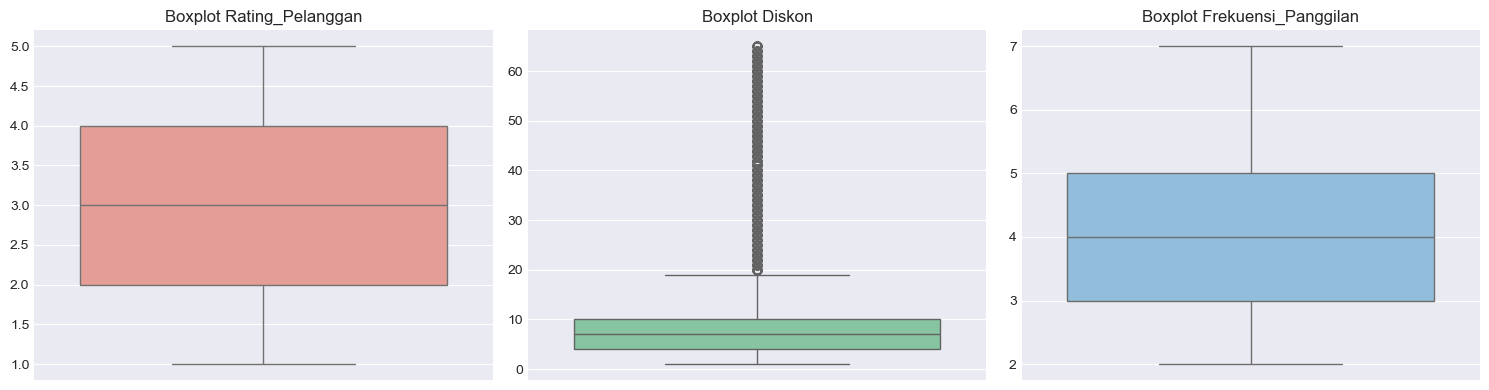


2. ANALISIS OUTLIER DENGAN METODE IQR
----------------------------------------

Rating_Pelanggan:
  Q1: 2.00, Q3: 4.00, IQR: 2.00
  Batas bawah: -1.00, Batas atas: 7.00
  Jumlah outlier: 0
  Persentase outlier: 0.00%

Diskon:
  Q1: 4.00, Q3: 10.00, IQR: 6.00
  Batas bawah: -5.00, Batas atas: 19.00
  Jumlah outlier: 2209
  Persentase outlier: 20.08%

Frekuensi_Panggilan:
  Q1: 3.00, Q3: 5.00, IQR: 2.00
  Batas bawah: 0.00, Batas atas: 8.00
  Jumlah outlier: 0
  Persentase outlier: 0.00%


In [11]:
# Variabel numerik untuk analisis outlier
numerical_vars = ['Rating_Pelanggan', 'Diskon', 'Frekuensi_Panggilan']

# Visualisasi dengan Boxplot
print('\nVISUALISASI OUTLIER DENGAN BOXPLOT')
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, var in enumerate(numerical_vars):
    sns.boxplot(data=df_clean, y=var, ax=axes[i], color=colors[i])
    axes[i].set_title(f'Boxplot {var}')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

# Analisis Outlier dengan Metode IQR
print('\n2. ANALISIS OUTLIER DENGAN METODE IQR')
print('-' * 40)

outlier_summary = []

for var in numerical_vars:
    Q1 = df_clean[var].quantile(0.25)
    Q3 = df_clean[var].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[var] < lower_bound) | (df_clean[var] > upper_bound)]
    
    outlier_info = {
        'Variabel': var,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Batas Bawah': lower_bound,
        'Batas Atas': upper_bound,
        'Jumlah Outlier': len(outliers),
        'Persentase': len(outliers)/len(df_clean)*100
    }
    outlier_summary.append(outlier_info)
    
    print(f'\n{var}:')
    print(f'  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}')
    print(f'  Batas bawah: {lower_bound:.2f}, Batas atas: {upper_bound:.2f}')
    print(f'  Jumlah outlier: {len(outliers)}')
    print(f'  Persentase outlier: {len(outliers)/len(df_clean)*100:.2f}%')


Pada kolom numerik `Rating_Pelanggan` dan `Frekuensi_Panggilan` tidak ditemukan adanya outlier, sementara pada kolom numerik `Diskon` ditemukan outlier sebanyak 2209 atau 20% dari keseluruhan data maka akan dilakukan analisa terlebih dahulu untuk kolom `Diskon`.

### **Handling Outliers**

Outlier adalah nilai yang menyimpang jauh dari pola data umum. Pada variabel `Diskon`, ditemukan nilai diskon yang ekstrem sehingga perlu dilakukan evaluasi lebih lanjut untuk memastikan apakah nilai tersebut merepresentasikan kondisi bisnis yang valid atau merupakan kesalahan data.

Outliers (diskon >19.0%): 2,209 (20.1%)
Rating outliers: 2.987
Rating non-outliers: 2.991


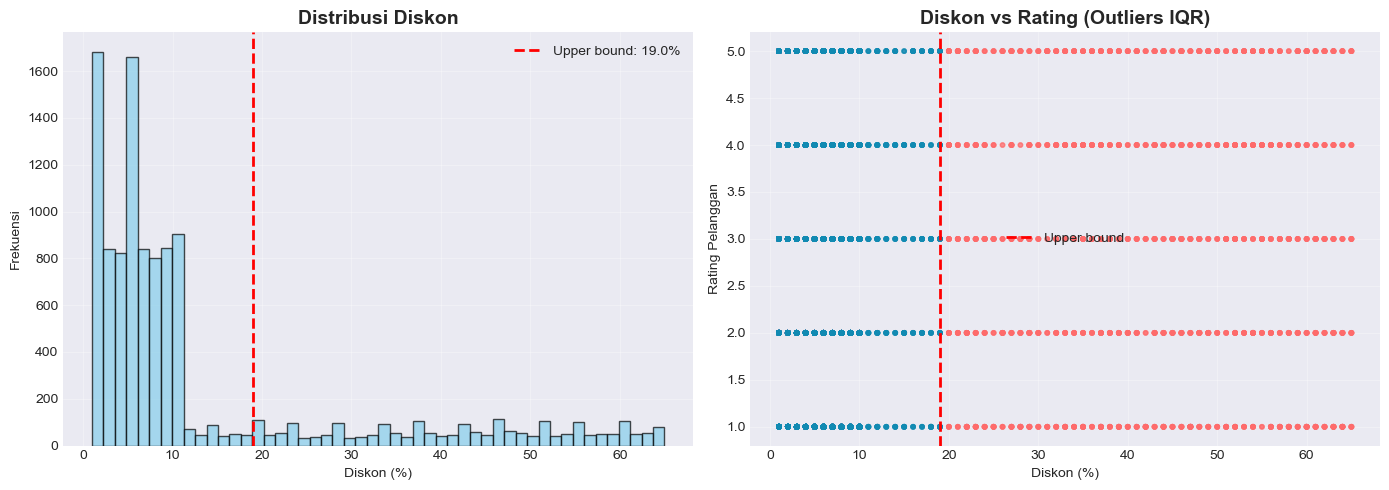

In [12]:
# Identifikasi outliers IQR
Q1 = df_clean['Diskon'].quantile(0.25)
Q3 = df_clean['Diskon'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[df_clean['Diskon'] > upper_bound]
normal_data = df_clean[df_clean['Diskon'] <= upper_bound]
print(f"Outliers (diskon >{upper_bound:.1f}%): {len(outliers):,} ({len(outliers)/len(df_clean)*100:.1f}%)")
print(f"Rating outliers: {outliers['Rating_Pelanggan'].mean():.3f}")
print(f"Rating non-outliers: {df_clean[df_clean['Diskon'] <= upper_bound]['Rating_Pelanggan'].mean():.3f}")

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_clean['Diskon'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(x=upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper bound: {upper_bound:.1f}%')
axes[0].set_title('Distribusi Diskon', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Diskon (%)')
axes[0].set_ylabel('Frekuensi')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Scatter plot
colors = np.where(df_clean['Diskon'] > upper_bound, '#FF6B6B', '#118AB2')
axes[1].scatter(df_clean['Diskon'], df_clean['Rating_Pelanggan'], alpha=0.5, s=10, c=colors)
axes[1].axvline(x=upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper bound')
axes[1].set_title('Diskon vs Rating (Outliers IQR)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Diskon (%)')
axes[1].set_ylabel('Rating Pelanggan')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Berdasarkan analisis histogram dan scatter plot, terlihat bahwa 20.1% order memiliki diskon di atas 19.0% (batas atas IQR). Histogram menunjukkan distribusi diskon yang tidak normal dengan ekor panjang di kanan, sementara scatter plot mengungkapkan bahwa meskipun rating order dengan diskon tinggi (2.987) sedikit lebih rendah dibanding order normal (2.991), perbedaannya tidak terlalu besar (0.005 poin). Outliers ini tetap dipertahankan karena dataset cukup besar dan data tersebut valid dalam konteks operasional perusahaan dan memberikan informasi penting tentang strategi pricing. Dataset yang cukup besar memungkinkan analisis yang robust meski dengan outliers.

****
## **EXPLORATORY DATA ANALYSIS (EDA)**
****

### **DISTRIBUSI VARIABEL UTAMA - STATISTIK DETAIL**


 DISTRIBUSI VARIABEL UTAMA - STATISTIK DETAIL
1. DISTRIBUSI RATING PELANGGAN
Total data rating: 10999

Distribusi per rating:
  Rating 1: 2235 data (20.3%)
  Rating 2: 2165 data (19.7%)
  Rating 3: 2239 data (20.4%)
  Rating 4: 2189 data (19.9%)
  Rating 5: 2171 data (19.7%)

Rating rata-rata: 2.99
Rating median: 3.00

2. DISTRIBUSI STATUS PENGIRIMAN
Total data status pengiriman: 10999

Distribusi per status:
  Tidak Tepat Waktu: 6563 data (59.7%)
  Tepat Waktu: 4436 data (40.3%)

3. DISTRIBUSI DISKON
Total data diskon: 10999

Distribusi diskon per kategori:
  0-10%: 7492 data (68.1%)
  11-20%: 1298 data (11.8%)
  21-30%: 465 data (4.2%)
  31-40%: 464 data (4.2%)
  41-50%: 507 data (4.6%)
  51-60%: 486 data (4.4%)

4. DISTRIBUSI FREKUENSI PANGGILAN
Total data frekuensi panggilan: 10999
Total jumlah panggilan keseluruhan: 44595
Rata-rata panggilan per pelanggan: 4.05

Distribusi frekuensi panggilan:
  2 panggilan: 638 data (5.8%)
  3 panggilan: 3217 data (29.2%)
  4 panggilan: 3557 dat

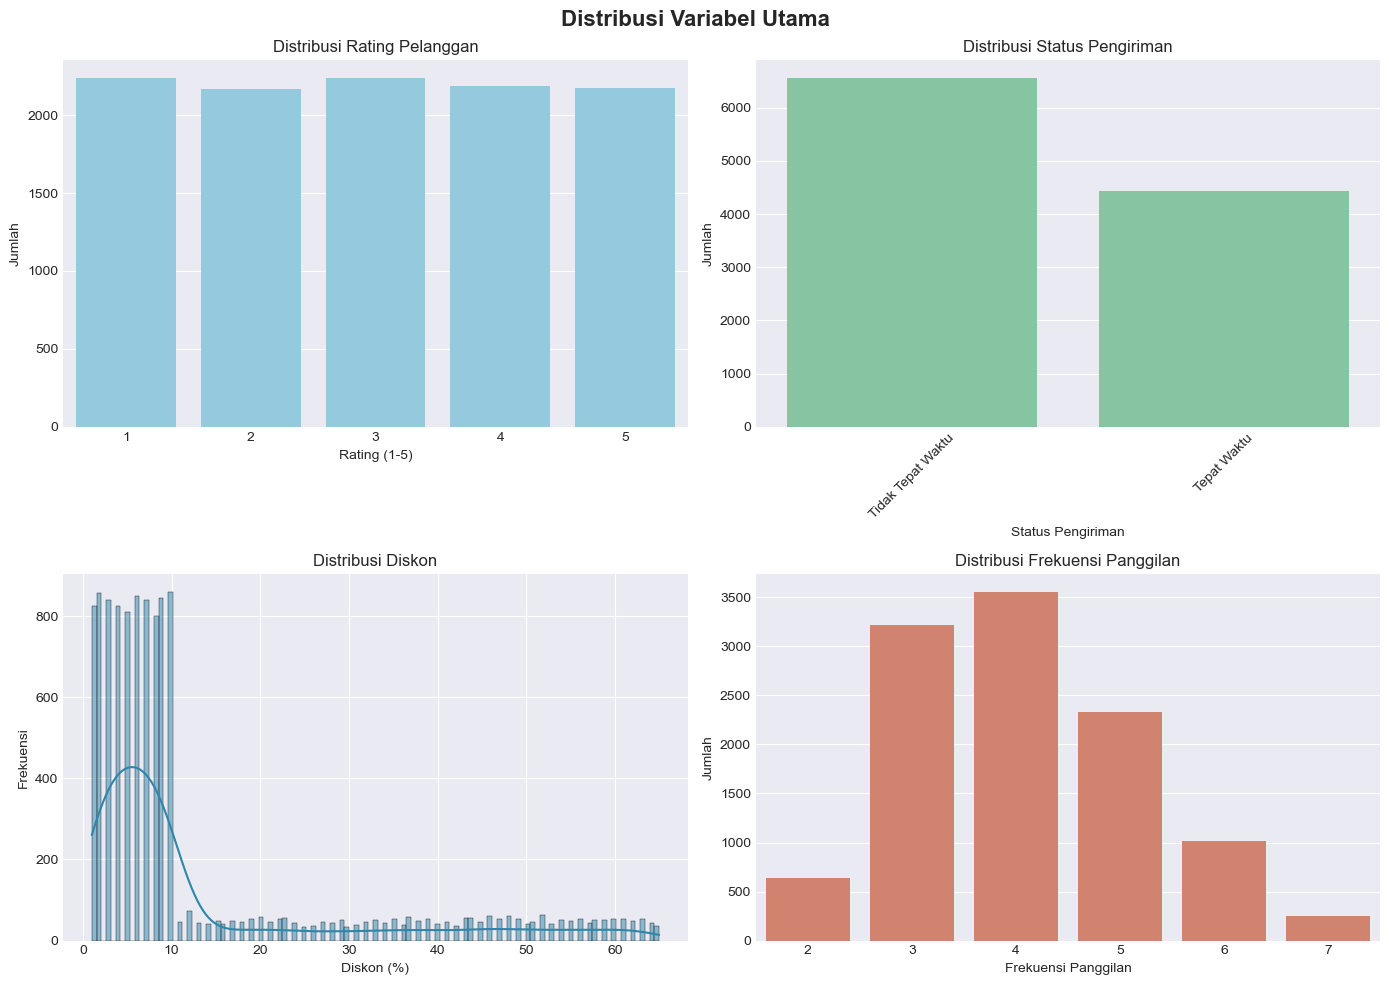

In [13]:
# 6.1 Distribusi variabel utama - Statistik Detail
print("\n DISTRIBUSI VARIABEL UTAMA - STATISTIK DETAIL")

# 1. Distribusi Rating Pelanggan
print("1. DISTRIBUSI RATING PELANGGAN")
print("="*60)

rating_counts = df_clean['Rating_Pelanggan'].value_counts().sort_index()
total_ratings = rating_counts.sum()

print(f"Total data rating: {total_ratings}")
print("\nDistribusi per rating:")
for rating, count in rating_counts.items():
    percentage = (count / total_ratings) * 100
    print(f"  Rating {rating}: {count} data ({percentage:.1f}%)")

print(f"\nRating rata-rata: {df_clean['Rating_Pelanggan'].mean():.2f}")
print(f"Rating median: {df_clean['Rating_Pelanggan'].median():.2f}")

# 2. Distribusi Status Pengiriman
print("\n2. DISTRIBUSI STATUS PENGIRIMAN")
print("="*60)

status_counts = df_clean['Status_Pengiriman'].value_counts()
total_status = status_counts.sum()

print(f"Total data status pengiriman: {total_status}")
print("\nDistribusi per status:")
for status, count in status_counts.items():
    percentage = (count / total_status) * 100
    print(f"  {status}: {count} data ({percentage:.1f}%)")

# 3. Distribusi Diskon
print("\n3. DISTRIBUSI DISKON")
print("="*60)

print(f"Total data diskon: {len(df_clean['Diskon'])}")

# Tampilkan distribusi diskon per kategori
print("\nDistribusi diskon per kategori:")
diskont_bins = [0, 10, 20, 30, 40, 50, 60]
diskont_labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%']

if 'Diskon' in df_clean.columns:
    df_clean['Diskon_Kategori'] = pd.cut(df_clean['Diskon'], bins=diskont_bins, labels=diskont_labels, right=False)
    diskont_kategori_counts = df_clean['Diskon_Kategori'].value_counts().sort_index()
    
    for kategori, count in diskont_kategori_counts.items():
        percentage = (count / len(df_clean)) * 100
        print(f"  {kategori}: {count} data ({percentage:.1f}%)")

# 4. Distribusi Frekuensi Panggilan
print("\n4. DISTRIBUSI FREKUENSI PANGGILAN")
print("="*60)

panggilan_counts = df_clean['Frekuensi_Panggilan'].value_counts().sort_index()
total_panggilan = panggilan_counts.sum()
total_panggilan_all = df_clean['Frekuensi_Panggilan'].sum()

print(f"Total data frekuensi panggilan: {total_panggilan}")
print(f"Total jumlah panggilan keseluruhan: {total_panggilan_all}")
print(f"Rata-rata panggilan per pelanggan: {df_clean['Frekuensi_Panggilan'].mean():.2f}")

print("\nDistribusi frekuensi panggilan:")
for frekuensi, count in panggilan_counts.items():
    percentage = (count / total_panggilan) * 100
    print(f"  {frekuensi} panggilan: {count} data ({percentage:.1f}%)")

# Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribusi Variabel Utama', fontsize=16, fontweight='bold')

# Distribusi Rating Pelanggan
sns.countplot(data=df_clean, color='skyblue', x='Rating_Pelanggan', ax=axes[0,0])
axes[0,0].set_title('Distribusi Rating Pelanggan')
axes[0,0].set_xlabel('Rating (1-5)')
axes[0,0].set_ylabel('Jumlah')

# Distribusi Status Pengiriman
sns.countplot(data=df_clean, x='Status_Pengiriman', color='#7DCEA0', ax=axes[0,1])
axes[0,1].set_title('Distribusi Status Pengiriman')
axes[0,1].set_xlabel('Status Pengiriman')
axes[0,1].set_ylabel('Jumlah')
axes[0,1].tick_params(axis='x', rotation=45)

# Distribusi Diskon
sns.histplot(data=df_clean, x='Diskon', color='#2E86AB', kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribusi Diskon')
axes[1,0].set_xlabel('Diskon (%)')
axes[1,0].set_ylabel('Frekuensi')

# Distribusi Frekuensi Panggilan
sns.countplot(data=df_clean, x='Frekuensi_Panggilan', color='#E07A5F', ax=axes[1,1])
axes[1,1].set_title('Distribusi Frekuensi Panggilan')
axes[1,1].set_xlabel('Frekuensi Panggilan')
axes[1,1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()


**INSIGHT**
****
- Rating 1-5 hampir sama persentasenya (~20% masing-masing), dengan rata-rata tepat 3.00. Tidak ada kecenderungan rating ekstrem, menunjukkan respons pelanggan yang netral dan terbagi rata.
- Hampir 60% pengiriman terlambat. Ini merupakan masalah operasional utama yang perlu segera ditangani karena berdampak langsung pada kepuasan pelanggan.
- Mayoritas pelanggan (68.1%) mendapat diskon kecil (0-10%). Hanya 13.2% yang mendapat diskon >30%, menunjukkan strategi diskon yang konservatif.
- Sebagian besar pelanggan (82.7%) dihubungi 3-5 kali, dengan rata-rata 4.05 panggilan. Pola ini menunjukkan standar prosedur follow-up yang sudah terstruktur.

### **Analisis hubungan Rating vs Status Pengiriman**


ANALISIS RATING vs STATUS PENGIRIMAN
Rating berdasarkan Status Pengiriman:


,mean,std,count
Status_Pengiriman,,,
Tepat Waktu,2.967989,1.414808,4436
Tidak Tepat Waktu,3.005790,1.412692,6563


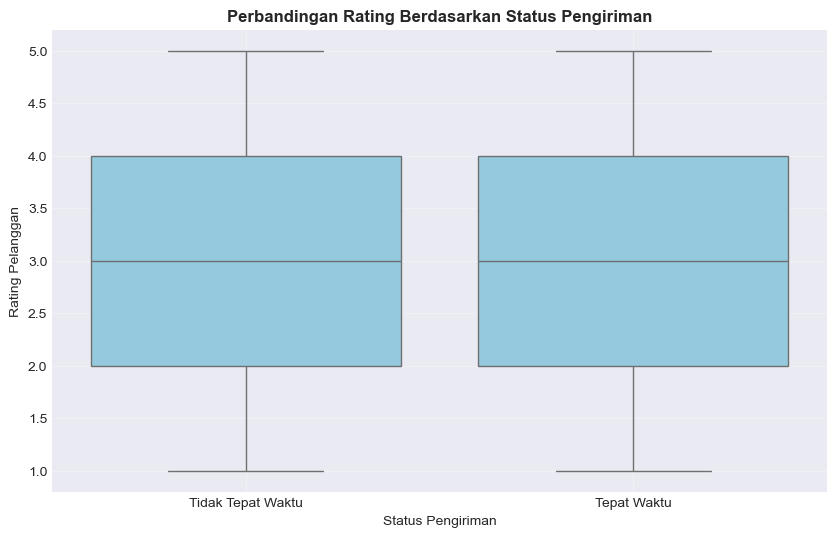

In [28]:
#  Analisis hubungan Rating vs Status Pengiriman
print("\nANALISIS RATING vs STATUS PENGIRIMAN")

rating_by_delivery = df_clean.groupby('Status_Pengiriman')['Rating_Pelanggan'].agg(['mean', 'std', 'count'])
print("Rating berdasarkan Status Pengiriman:")
display(rating_by_delivery)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Status_Pengiriman', y='Rating_Pelanggan',color='skyblue')
plt.title('Perbandingan Rating Berdasarkan Status Pengiriman', fontweight='bold')
plt.xlabel('Status Pengiriman')
plt.ylabel('Rating Pelanggan')
plt.grid(True, alpha=0.3)
plt.show()

**INSIGHT**
****
- Rating rata-rata hampir sama antara pengiriman tepat waktu (2.97) dan tidak tepat waktu (3.01). Perbedaan hanya 0.038 poin, yang sangat kecil.
- Meski 60% pengiriman terlambat, rating pelanggan tidak lebih rendah.
- Kedua boxplot memiliki posisi median yang sangat mirip (sekitar rating 3), menunjukkan bahwa secara umum pelanggan memberi rating netral terlepas dari ketepatan pengiriman.ur.

### **Analisis hubungan Rating vs Diskon**


ANALISIS RATING vs DISKON
 Rating berdasarkan Kategori Diskon:


,mean,std,count
Kategori_Diskon,,,
Rendah (≤10%),2.989583,1.411675,8352
Sangat Tinggi (>30%),3.000585,1.430463,1710
Sedang (11-20%),3.060484,1.379639,496
Tinggi (21-30%),2.891156,1.421247,441


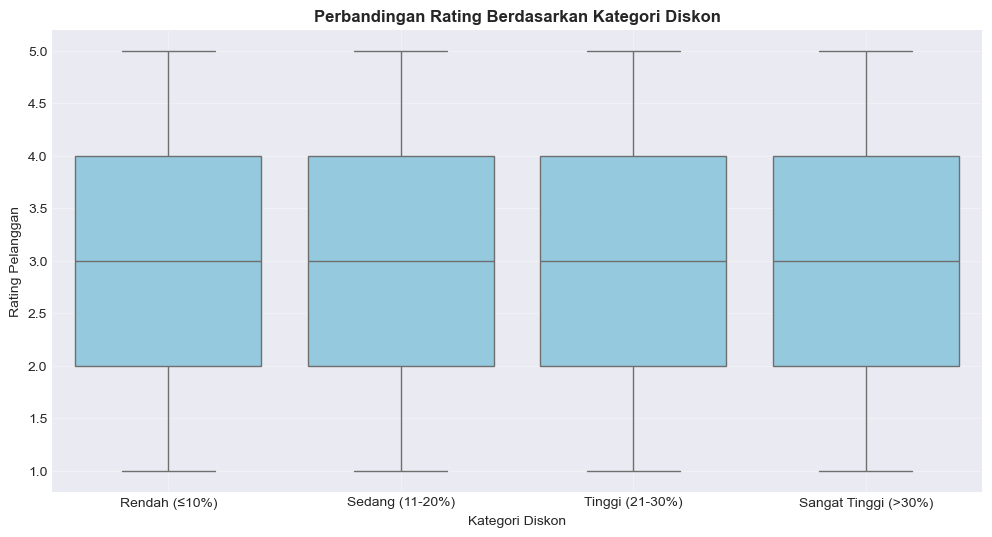

In [15]:
#  Analisis hubungan Rating vs Diskon
print("\nANALISIS RATING vs DISKON")

# Kategorisasi diskon
def kategori_diskon(x):
    if x <= 10:
        return 'Rendah (≤10%)'
    elif x <= 20:
        return 'Sedang (11-20%)'
    elif x <= 30:
        return 'Tinggi (21-30%)'
    else:
        return 'Sangat Tinggi (>30%)'

df_clean['Kategori_Diskon'] = df_clean['Diskon'].apply(kategori_diskon)

rating_by_discount = df_clean.groupby('Kategori_Diskon')['Rating_Pelanggan'].agg(['mean', 'std', 'count'])
print(" Rating berdasarkan Kategori Diskon:")
display(rating_by_discount)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Kategori_Diskon', y='Rating_Pelanggan', color='skyblue',
            order=['Rendah (≤10%)', 'Sedang (11-20%)', 'Tinggi (21-30%)', 'Sangat Tinggi (>30%)'])
plt.title('Perbandingan Rating Berdasarkan Kategori Diskon', fontweight='bold')
plt.xlabel('Kategori Diskon')
plt.ylabel('Rating Pelanggan')
plt.grid(True, alpha=0.3)
plt.show()

**INSIGHT**
****
- Kategori diskon 11-20% memiliki rating rata-rata tertinggi (3.06), menunjukkan bahwa diskon moderat paling efektif meningkatkan kepuasan pelanggan.
- Diskon 21-30% punya rating terendah (2.89), mengindikasikan bahwa diskon besar mungkin dikaitkan dengan produk bermasalah atau menurunkan persepsi kualitas.
- Semua boxplot memiliki median sekitar rating 3, menunjukkan bahwa secara umum pelanggan memberi rating netral terlepas dari besaran diskon.

### **Analisis hubungan Rating vs Frekuensi Panggilan**


ANALISIS RATING vs FREKUENSI PANGGILAN
Rating berdasarkan Frekuensi Panggilan:


,mean,std,count
Frekuensi_Panggilan,,,
2,3.017241,1.434499,638
3,2.959901,1.412875,3217
4,2.998032,1.397711,3557
5,2.972938,1.430723,2328
6,3.083909,1.405054,1013
7,2.995935,1.463844,246


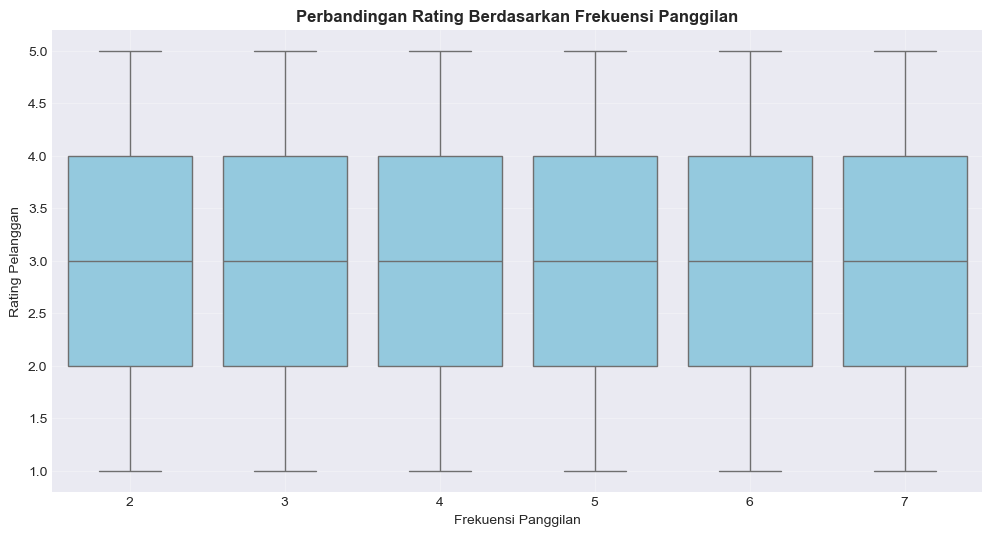

In [16]:
# Analisis hubungan Rating vs Frekuensi Panggilan
print("\nANALISIS RATING vs FREKUENSI PANGGILAN")

rating_by_calls = df_clean.groupby('Frekuensi_Panggilan')['Rating_Pelanggan'].agg(['mean', 'std', 'count'])
print("Rating berdasarkan Frekuensi Panggilan:")
display(rating_by_calls)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean, x='Frekuensi_Panggilan', y='Rating_Pelanggan',color='skyblue')
plt.title('Perbandingan Rating Berdasarkan Frekuensi Panggilan', fontweight='bold')
plt.xlabel('Frekuensi Panggilan')
plt.ylabel('Rating Pelanggan')
plt.grid(True, alpha=0.3)
plt.show()


**INSIGHT**
****
- Rating rata-rata stabil di sekitar 2.96–3.08 di semua frekuensi panggilan. Artinya, jumlah kontak tidak secara langsung meningkatkan atau menurunkan kepuasan pelanggan.
- Pelanggan yang dihubungi 6 kali memiliki rating rata-rata tertinggi (3.08), meski hanya sedikit lebih tinggi dari yang lain. Bisa jadi ini titik optimal follow-up sebelum menjadi mengganggu.
- Meski frekuensi 3 kali adalah yang paling umum (32.3% data), ratingnya justru terendah (2.96). Menunjukkan bahwa follow-up rutin belum tentu meningkatkan kepuasan.

### **Analisis korelasi**


ANALISIS KORELASI
 Matriks Korelasi Spearman:


,Rating_Pelanggan,Diskon,Frekuensi_Panggilan
Rating_Pelanggan,1.000000,-0.002299,0.011862
Diskon,-0.002299,1.000000,-0.104223
Frekuensi_Panggilan,0.011862,-0.104223,1.000000


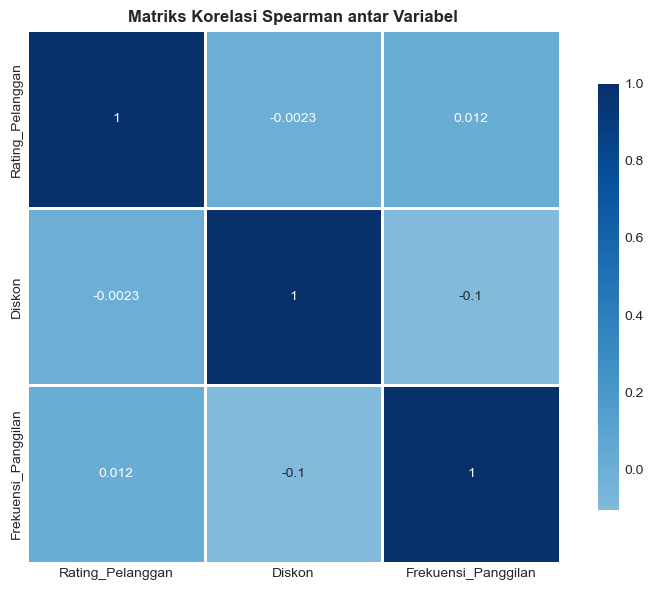

In [17]:
#  Analisis korelasi
print("\nANALISIS KORELASI")

# Hitung korelasi Spearman (karena data rating ordinal)
correlation_matrix = df_clean[['Rating_Pelanggan', 'Diskon', 'Frekuensi_Panggilan']].corr(method='spearman')
print(" Matriks Korelasi Spearman:")
display(correlation_matrix)

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriks Korelasi Spearman antar Variabel', fontweight='bold')
plt.tight_layout()
plt.show()


**INSIGHT**
****
- Korelasi -0.104 antara Diskon dan Frekuensi Panggilan menunjukkan tren lemah: pelanggan dengan diskon besar cenderung sedikit dihubungi, atau sebaliknya.
- Korelasi Rating dengan Diskon (-0.0023) dan Frekuensi Panggilan (0.0119) sangat mendekati nol. Artinya, baik diskon maupun intensitas kontak tidak berkaitan linear dengan tingkat kepuasan pelanggan.

****
## **Analisis Statistik**
****


In [18]:
# Import uji non-parametrik
from scipy.stats import mannwhitneyu, spearmanr, kruskal

### **1. Uji Mann-Whitney untuk Status Pengiriman vs Rating**
Menguji apakah ada perbedaan sigmnifikan dalam rating pelanggan antara pengiriman yang tepat waktu dan tidak tepat waktu.
Alasan menggunakan Mann-Whitney U:

1. Data rating tidak berdistribusi normal
1. Ingin membandingkan median rating dua kelompok independen

In [19]:
print("\nUJI STATISTIK 1: STATUS PENGIRIMAN vs RATING")

# Pisahkan data berdasarkan status pengiriman
rating_tepat_waktu = df_clean[df_clean['Status_Pengiriman'] == 'Tepat Waktu']['Rating_Pelanggan']
rating_tidak_tepat = df_clean[df_clean['Status_Pengiriman'] == 'Tidak Tepat Waktu']['Rating_Pelanggan']

# Lakukan uji Mann-Whitney
stat, p_value = mannwhitneyu(rating_tepat_waktu, rating_tidak_tepat)

print(f"Hasil Uji Mann-Whitney:")
print(f"  • Statistik U: {stat:,.2f}")
print(f"  • p-value: {p_value:.4f}")
print(f"  • Signifikan (α=0.05): {'YA' if p_value < 0.05 else 'TIDAK'}")

if p_value < 0.05:
    print("  • Kesimpulan: Terdapat perbedaan signifikan rating antara pengiriman tepat waktu dan tidak tepat waktu")
else:
    print("  • Kesimpulan: Tidak terdapat perbedaan signifikan rating antara pengiriman tepat waktu dan tidak tepat waktu")


UJI STATISTIK 1: STATUS PENGIRIMAN vs RATING
Hasil Uji Mann-Whitney:
  • Statistik U: 14,336,706.00
  • p-value: 0.1692
  • Signifikan (α=0.05): TIDAK
  • Kesimpulan: Tidak terdapat perbedaan signifikan rating antara pengiriman tepat waktu dan tidak tepat waktu


### **2. Uji Korelasi Spearman Diskon vs Rating**
Menguji hubungan/korelasi antara besaran diskon yang diberikan dengan rating pelanggan.
Alasan menggunakan uji korelasi spearman:

1. Data diskon dan rating tidak berdistribusi normal
1. Cocok untuk data ordinal 

In [20]:
# 7.2 Uji Korelasi Spearman untuk Diskon vs Rating
print("\nUJI STATISTIK 2: DISKON vs RATING")

corr_diskon, p_diskon = spearmanr(df_clean['Diskon'], df_clean['Rating_Pelanggan'])

print(f"Hasil Uji Korelasi Spearman (Diskon vs Rating):")
print(f"  • Koefisien Korelasi: {corr_diskon:.4f}")
print(f"  • p-value: {p_diskon:.4f}")
print(f"  • Signifikan (α=0.05): {'YA' if p_diskon < 0.05 else 'TIDAK'}")

if p_diskon < 0.05:
    if corr_diskon > 0:
        print(f"  • Interpretasi: Terdapat korelasi positif signifikan (r={corr_diskon:.2f})")
    else:
        print(f"  • Interpretasi: Terdapat korelasi negatif signifikan (r={corr_diskon:.2f})")
else:
    print("  • Interpretasi: Tidak terdapat korelasi signifikan antara diskon dan rating")


UJI STATISTIK 2: DISKON vs RATING
Hasil Uji Korelasi Spearman (Diskon vs Rating):
  • Koefisien Korelasi: -0.0023
  • p-value: 0.8095
  • Signifikan (α=0.05): TIDAK
  • Interpretasi: Tidak terdapat korelasi signifikan antara diskon dan rating


### **3. Uji Korelasi Spearman Frekuensi Panggilan vs Rating**
Menguji hubungan antara frekuensi panggilan customer service dengan rating pelanggan.
Alasan menggunakan uji korelasi spearman:

1. Data frekuensi panggilan dan rating tidak berdistribusi normal
1. Cocok untuk data ordinal 

In [21]:
# 7.3 Uji Korelasi Spearman untuk Frekuensi Panggilan vs Rating
print("\nUJI STATISTIK 3: FREKUENSI PANGGILAN vs RATING")

corr_calls, p_calls = spearmanr(df_clean['Frekuensi_Panggilan'], df_clean['Rating_Pelanggan'])

print(f"Hasil Uji Korelasi Spearman (Panggilan vs Rating):")
print(f"  • Koefisien Korelasi: {corr_calls:.4f}")
print(f"  • p-value: {p_calls:.4f}")
print(f"  • Signifikan (α=0.05): {'YA' if p_calls < 0.05 else 'TIDAK'}")

if p_calls < 0.05:
    if corr_calls > 0:
        print(f"  • Interpretasi: Terdapat korelasi positif signifikan (r={corr_calls:.2f})")
    else:
        print(f"  • Interpretasi: Terdapat korelasi negatif signifikan (r={corr_calls:.2f})")
else:
    print("  • Interpretasi: Tidak terdapat korelasi signifikan antara frekuensi panggilan dan rating")



UJI STATISTIK 3: FREKUENSI PANGGILAN vs RATING
Hasil Uji Korelasi Spearman (Panggilan vs Rating):
  • Koefisien Korelasi: 0.0119
  • p-value: 0.2135
  • Signifikan (α=0.05): TIDAK
  • Interpretasi: Tidak terdapat korelasi signifikan antara frekuensi panggilan dan rating


In [22]:
### **Ringkasan Hasil Uji Statistik**

In [23]:
print("RINGKASAN HASIL UJI STATISTIK")
print("-"*50)

summary_stats = pd.DataFrame({
    'Variabel Independen': ['Status Pengiriman', 'Diskon', 'Frekuensi Panggilan'],
    'Uji Statistik': ['Mann-Whitney U', 'Spearman', 'Spearman'],
    'Statistik': [f"{stat:,.2f}", f"{corr_diskon:.4f}", f"{corr_calls:.4f}"],
    'p-value': [f"{p_value:.4f}", f"{p_diskon:.4f}", f"{p_calls:.4f}"],
    'Signifikan (α=0.05)': ['YA' if p_value < 0.05 else 'TIDAK',
                           'YA' if p_diskon < 0.05 else 'TIDAK',
                           'YA' if p_calls < 0.05 else 'TIDAK']
})

display(summary_stats)

RINGKASAN HASIL UJI STATISTIK
--------------------------------------------------


,Variabel Independen,Uji Statistik,Statistik,p-value,Signifikan (α=0.05)
0,Status Pengiriman,Mann-Whitney U,"14,336,706.00",0.1692,TIDAK
1,Diskon,Spearman,-0.0023,0.8095,TIDAK
2,Frekuensi Panggilan,Spearman,0.0119,0.2135,TIDAK


**INSIGHT**
****
- Tidak ada satupun variabel (Status Pengiriman, Diskon, Frekuensi Panggilan) yang memiliki hubungan signifikan dengan Rating Pelanggan (p-value > 0.05). Artinya, tidak ada bukti statistik bahwa ketiga faktor ini memengaruhi kepuasan pelanggan.
- Meski 60% pengiriman terlambat, uji Mann-Whitney menunjukkan tidak ada perbedaan rating yang signifikan antara pengiriman tepat waktu vs terlambat (p=0.1692).
- Korelasi Spearman mendekati nol dan tidak signifikan (p>0.05) mengonfirmasi bahwa strategi diskon dan intensitas panggilan tidak terkait dengan peningkatan rating.


****
## **Analisis Multivariat**
****


### **Analisis kombinasi faktor**


ANALISIS KOMBINASI FAKTOR

Rating berdasarkan Kombinasi Status Pengiriman dan Frekuensi Panggilan:


mean  count
Status_Pengiriman Kategori_Panggilan             
Tepat Waktu       Banyak (≥6)         3.00    609
                  Sedang (4-5)        2.94   2399
                  Sedikit (≤3)        2.99   1428
Tidak Tepat Waktu Banyak (≥6)         3.12    650
                  Sedang (4-5)        3.02   3486
                  Sedikit (≤3)        2.96   2427

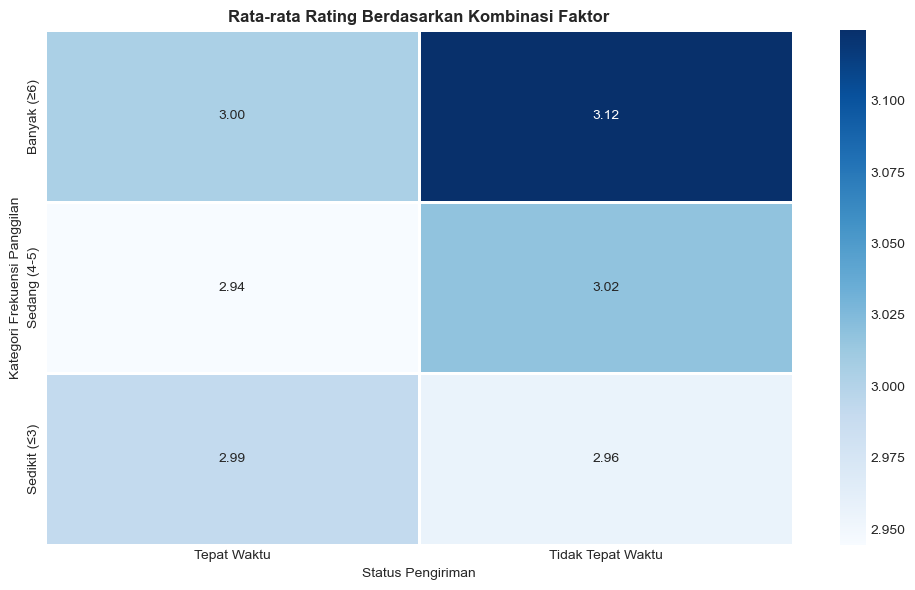

In [24]:
#  Analisis kombinasi faktor
print("\nANALISIS KOMBINASI FAKTOR")

# Buat kategori untuk frekuensi panggilan
def kategori_panggilan(x):
    if x <= 3:
        return 'Sedikit (≤3)'
    elif x <= 5:
        return 'Sedang (4-5)'
    else:
        return 'Banyak (≥6)'

df_clean['Kategori_Panggilan'] = df_clean['Frekuensi_Panggilan'].apply(kategori_panggilan)

# Analisis kombinasi status pengiriman dan kategori panggilan
combination_analysis = df_clean.groupby(['Status_Pengiriman', 'Kategori_Panggilan'])['Rating_Pelanggan'].agg(['mean', 'count']).round(2)
print("\nRating berdasarkan Kombinasi Status Pengiriman dan Frekuensi Panggilan:")
display(combination_analysis)

# Visualisasi
pivot_table = df_clean.pivot_table(values='Rating_Pelanggan', 
                                   index='Kategori_Panggilan', 
                                   columns='Status_Pengiriman', 
                                   aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.2f', linewidths=1)
plt.title('Rata-rata Rating Berdasarkan Kombinasi Faktor', fontweight='bold')
plt.xlabel('Status Pengiriman')
plt.ylabel('Kategori Frekuensi Panggilan')
plt.tight_layout()
plt.show()

**INSIGHT**
****
- Kombinasi "Tidak Tepat Waktu" dengan panggilan ≥6 kali menghasilkan rating tertinggi (3.12). Menunjukkan bahwa follow-up intensif bisa memitigasi dampak keterlambatan.
- Rating terendah (2.94) terjadi saat pengiriman tepat waktu tapi dengan panggilan 4-5 kali. Mungkin dianggap terlalu sering dan mengganggu.
- Kombinasi terbaik untuk efisiensi: pengiriman tepat waktu dengan ≤3 panggilan menghasilkan rating 2.99 (hampir sama dengan follow-up intensif).
- Pengaruh frekuensi panggilan terhadap rating bergantung pada status pengiriman. Ini menjelaskan mengapa analisis terpisah sebelumnya menunjukkan korelasi lemah.

### **Analisis segmentasi pelanggan**

In [25]:
# Analisis segmentasi pelanggan
print("\nANALISIS SEGMENTASI PELANGGAN")

# Segmentasi berdasarkan rating
def segmentasi_rating(rating):
    if rating <= 2:
        return 'Tidak Puas (1-2)'
    elif rating == 3:
        return 'Netral (3)'
    else:
        return 'Puas (4-5)'

df_clean['Segmentasi_Rating'] = df_clean['Rating_Pelanggan'].apply(segmentasi_rating)

segment_analysis = df_clean.groupby('Segmentasi_Rating').agg({
    'Diskon': 'mean',
    'Frekuensi_Panggilan': 'mean',
    'Status_Pengiriman_Num': lambda x: (x == 1).mean()  # proporsi tidak tepat waktu
}).round(3)

print("\nKarakteristik Segmentasi Pelanggan:")
display(segment_analysis)


ANALISIS SEGMENTASI PELANGGAN

Karakteristik Segmentasi Pelanggan:


,Diskon,Frekuensi_Panggilan,Status_Pengiriman_Num
Segmentasi_Rating,,,
Netral (3),12.980,4.058,0.606
Puas (4-5),13.375,4.065,0.601
Tidak Puas (1-2),13.571,4.043,0.588


**INSIGHT**
****
- Rata-rata diskon tertinggi (13.57%) justru pada pelanggan tidak puas (rating 1-2). Ini mengindikasikan strategi diskon tidak efektif untuk meningkatkan kepuasan, bahkan mungkin memberi kesan produk murahan.
- Perbedaan sangat kecil (4.04-4.06 panggilan), artinya intensitas kontak tidak membedakan tingkat kepuasan. Follow-up yang dilakukan selama ini bersifat umum, tidak disesuaikan dengan kebutuhan segmen.
- Nilai 0.588 (artinya ~58.8% pengiriman terlambat) untuk tidak puas vs 0.601-0.606 untuk puas/netral. Keterlambatan memang berpengaruh, tapi bukan faktor dominan.
- Karakteristik pelanggan netral (rating 3) hampir identik dengan puas (4-5) dalam semua aspek. Mereka adalah calon pelanggan puas yang bisa ditingkatkan dengan intervensi tepat.
- Perbedaan angka sangat kecil di semua variabel, menunjukkan bahwa faktor-faktor kuantitatif ini bukan penentu utama rating. Faktor kualitatif (kualitas produk, layanan, ekspektasi) kemungkinan lebih penting.

****
## **Kesimpulan**
****
1. **Rating Pelanggan Netral dan Merata**
   - Distribusi rating hampir sama di setiap level (1–5, masing-masing ~20%), dengan rata-rata tepat 3.00. Tidak ada kecenderungan ekstrem, menunjukkan respons pelanggan yang netral namun terbagi rata.

2. **Status Pengiriman Tidak Signifikan Terhadap Rating**
   - 59.7% pengiriman terlambat, namun perbedaan rating antara tepat waktu (2.97) dan terlambat (3.01) hanya 0.04 poin (tidak signifikan secara statistik, p=0.1692).
   - Tidak ada korelasi antara ketepatan waktu dengan tingkat kepuasan pelanggan.
    
3. **Strategi Diskon Tidak Efektif Meningkatkan Kepuasan**
   - Diskon sedang (11-20%) memberikan rating tertinggi (3.06), sementara diskon besar (>30%) tidak meningkatkan rating (3.00).
   - Korelasi hampir nol (-0.0023) dan tidak signifikan (p=0.8095).
   - Pelanggan tidak puas justru mendapat diskon lebih besar (13.57% vs 13.38% untuk yang puas).

4. **Frekuensi Panggilan Tidak Berdampak Signifikan**
   - Rata-rata 4.05 panggilan per pelanggan, namun rating stabil di semua frekuensi (2.96-3.08).
   - Tidak ada korelasi signifikan (0.0119, p=0.2135) antara jumlah panggilan dengan rating.
     
5. **Tidak Ada Faktor Tunggal yang Signifikan**
   - Semua variabel yang dianalisis (status pengiriman, diskon, frekuensi panggilan) tidak signifikan secara statistik dalam mempengaruhi rating.
   - Rating cenderung netral (rata-rata 3.00) dengan distribusi merata di semua level (1-5 masing-masing ~20%).n.
6. **Interaksi Antar Faktor Lebih Penting**
   - Kombinasi faktor menunjukkan pola: Follow-up intensif (≥6 panggilan) dapat memitigasi dampak keterlambatan (rating 3.12).
   - Strategi optimal berbeda berdasarkan kondisi pengiriman.
     


****
## **Rekomendasi**
****
1. **Perbaikan Proses Pengiriman**
   - Optimalkan logistik untuk mengurangi 59.7% keterlambatan pengiriman, meski tidak langsung mempengaruhi rating, tetapi penting untuk reputasi jangka panjang.
   - Implementasi notifikasi proaktif untuk mengelola ekspektasi pelanggan jika terjadi keterlambatan.
     
2. **Evaluasi Strategi Promosi**
   - Alihkan alokasi diskon >30% (saat ini tidak efektif) ke kategori 11-20% (rating 3.06 vs 2.89 untuk 21-30%).
   - Hentikan pemberian diskon besar ke pelanggan tidak puas (rata-rata 13.57% vs puas 13.38%) karena terbukti tidak meningkatkan rating.
    
3. **Strategi Komunikasi yang Diferensiasi**
   - Implementasi aturan frekuensi berbeda:
       - Pengiriman tepat waktu → maksimal 3 panggilan (rating 2.99)
       - Pengiriman terlambat → 5-6 panggilan proaktif (rating 3.12)
    - Kurangi panggilan 4-5 kali untuk pengiriman tepat waktu (rating terendah: 2.94).

4. **Pengumpulan Data yang Lebih Relevan**
   - Kumpulkan variabel baru mengingat ketiga variabel saat ini hanya menjelaskan <1% variasi rating (korelasi mendekati 0).
   - Fokus pada data kualitatif seperti jenis komplain, waktu resolusi, dan feedback spesifik.
     
5. **Faktor Non-Kuantitatif sebagai Prioritas**
   - Investasi pada kualitas produk dan layanan sebagai pengganti diskon besar.
   - Standardisasi experience di semua touchpoint, karena rating netral (3.00) menunjukkan tidak ada keunggulan kompetitif yang jelas.

Target jangka pendek: Naikkan rating rata-rata dari 3.00 ke 3.3 dengan mengoptimalkan kombinasi faktor (khususnya pengiriman terlambat+follow-up intensif) dan revisi strategi diskon.

In [26]:

# 1. Ekspor data lengkap
df_clean.to_csv('customer_rating_full_data.csv', index=False)